<a href="https://colab.research.google.com/github/cryssoga/DSWP/blob/master/Notebook%20/%20Exerc%C3%ADcio%209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Exercício 9
# 1. Carregue o arquivo FIFA.csv (está na área de Dataframes do curso)

url = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Dataframes/FIFA.csv'
df_Fifa = pd.read_csv(url)

# Indexando o dataframe pela variável 'ID'
df_Fifa.set_index('ID', inplace=True)

# Exercício 9
# 5.a) Normalize os nomes das colunas, ou seja, renomeie o nome das colunas para minúsculo. 
nome_colunas = df_Fifa.columns
df_Fifa.columns = [col.lower() for col in nome_colunas]

# Seguindo o PEP em que as letras são minúsculas, portanto, convertendo 'df_Fifa' para df_fifa':
df_fifa = df_Fifa.copy()
df_fifa.head()

,unnamed: 0,name,age,photo,nationality,flag,overall,potential,club,club logo,value,wage,special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,real face,position,jersey number,joined,loaned from,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,...,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
df_fifa.shape

(18207, 88)

In [51]:
# Exercício 9
# 2. Que colunas podem previamente ser eliminadas da análise? Porque identificar o que pode ser eliminado é importante?
# Minha resposta: colunas com foto, logo do país e do clube, irrelevantes  para análise de dados e ocupam espaço/memória/tempo

df_fifa = df_fifa.drop(['unnamed: 0','photo','flag','club logo', 'real face','jersey number','loaned from'], axis = 1)
df_fifa.shape

(18207, 81)

In [ ]:
# Exercício 9
# 3. Qual o dtype de cada variável/atributo do dataframe?
# OBS.: df_fifa.info => mostra todas as colunas sem truncar, qtde de variáveis de cada tipo e uso de memória, vide execução na célula seguinte
df_fifa.dtypes      

In [ ]:
df_fifa.info()

In [ ]:
df_fifa.columns

Index(['name', 'age', 'nationality', 'overall', 'potential', 'club', 'value',
       'wage', 'special', 'preferred foot', 'international reputation',
       'weak foot', 'skill moves', 'work rate', 'body type', 'position',
       'joined', 'contract valid until', 'height', 'weight', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'crossing', 'finishing', 'headingaccuracy', 'shortpassing',
       'volleys', 'dribbling', 'curve', 'fkaccuracy', 'longpassing',
       'ballcontrol', 'acceleration', 'sprintspeed', 'agility', 'reactions',
       'balance', 'shotpower', 'jumping', 'stamina', 'strength', 'longshots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standingtackle', 'slidingtackle', 'gkdiving',
       'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes',
       'release clause']

In [ ]:
# Exercício 9
# 4. Se alguma variável/atributo é do tipo string (object) e supostamente deveria ser numérica, como alteramos o tipo?

# Colunas 'value' e 'wage' são object e apresentam primeiro caracter '€' e último caracter 'M' (million) e 'K' (thousand)
df_fifa[['value','wage','release clause']].tail()

,value,wage,release clause
ID,,,
238813,€60K,€1K,€143K
243165,€60K,€1K,€113K
241638,€60K,€1K,€165K
246268,€60K,€1K,€143K
246269,€60K,€1K,€165K


In [40]:
# Marcelo Fernandes de Oliveira postou em 13/10/2020, às 16h56, durante Aula 08:
# usando regex em função:

df = df_fifa.copy()

In [52]:
# "corrigido"
import re
def expand_number(input_compact: str):
 
    # dicionário de conversão (definir sufixos sempre em maiúsculo)
    repl_dict = {'K': 1e3, 'M': 1e6, 'B': 1e9, }
 
    # se não for do tipo texto
    if type(input_compact) != str:
        return input_compact
 
    # obter os grupos do string (prefixo, número, abreviação)  
    prog = re.compile(rf"^([RUS$€£]+)?\s*?([\d\.]+)\s*?([{''.join(repl_dict.keys())}])?$", re.IGNORECASE) 
    grp = prog.match(input_compact.upper())
 
    # obter o multiplicador baseado no dicionário de substituição
    mult = repl_dict.get(grp.group(3), 1)
    return float(grp.group(2)) * float(mult)

In [53]:
# aplicando a função acima definida por Marcelo Fernandes de Oliveira:

df['value'] = df['value'].apply(expand_number)
df['wage'] = df['wage'].apply(expand_number)
df['release clause'] = df['release clause'].apply(expand_number)
df_fifa = df.copy()
df_fifa[['value','wage','release clause']]


,value,wage,release clause
ID,,,
158023,110500000.0,565000.0,226500000.0
20801,77000000.0,405000.0,127100000.0
190871,118500000.0,290000.0,228100000.0
193080,72000000.0,260000.0,138600000.0
192985,102000000.0,355000.0,196400000.0
...,...,...,...
238813,60000.0,1000.0,143000.0
243165,60000.0,1000.0,113000.0
241638,60000.0,1000.0,165000.0


In [54]:
df_fifa.tail()

,name,age,nationality,overall,potential,club,value,wage,special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,position,joined,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,...,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60000.0,1000.0,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,"May 3, 2017",2019,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,...,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000.0,1000.0,1098,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,"Mar 19, 2018",2020,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,...,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
241638,B. Worman,16,England,47,67,Cambridge United,60000.0,1000.0,1189,Right,1.0,3.0,2.0,Medium/ Medium,Normal,ST,"Jul 1, 2017",2021,5'8,148lbs,45+2,45+2,45+2,45+2,46+2,46+2,46+2,45+2,44+2,44+2,44+2,44+2,38+2,38+2,38+2,44+2,34+2,30+2,30+2,30+2,...,33+2,28+2,28+2,28+2,33+2,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60000.0,1000.0,1228,Right,1.0,3.0,2.0,Medium/ Medium,Lean,RW,"Apr 24, 2018",2019,5'10,154lbs,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2,45+2,45+2,45+2,46+2,39+2,39+2,39+2,46+2,36+2,32+2,32+2,32+2,...,35+2,31+2,31+2,31+2,35+2,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0
246269,G. Nugent,16,England,46,66,Tranmere Rovers,60000.0,1000.0,1321,Right,1.0,3.0,2.0,Medium/ Medium,Lean,CM,"Oct 30, 2018",2019,5'10,176lbs,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,45+2,45+2,45+2,46+2,45+2,45+2,45+2,46+2,46+2,46+2,46+2,46+2,...,46+2,47+2,47+2,47+2,46+2,41.0,34.0,46.0,48.0,30.0,43.0,40.0,34.0,44.0,51.0,57.0,55.0,55.0,51.0,63.0,43.0,62.0,47.0,60.0,32.0,56.0,42.0,34.0,49.0,33.0,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,165000.0


In [56]:
df_fifa.columns

Index(['name', 'age', 'nationality', 'overall', 'potential', 'club', 'value',
       'wage', 'special', 'preferred foot', 'international reputation',
       'weak foot', 'skill moves', 'work rate', 'body type', 'position',
       'joined', 'contract valid until', 'height', 'weight', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'crossing', 'finishing', 'headingaccuracy', 'shortpassing',
       'volleys', 'dribbling', 'curve', 'fkaccuracy', 'longpassing',
       'ballcontrol', 'acceleration', 'sprintspeed', 'agility', 'reactions',
       'balance', 'shotpower', 'jumping', 'stamina', 'strength', 'longshots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standingtackle', 'slidingtackle', 'gkdiving',
       'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes',
       'release clause']

In [67]:
df_fifa2 = df_fifa.copy()

In [68]:
df_fifa2.drop(columns=['special', 'preferred foot', 'international reputation',
       'weak foot', 'skill moves', 'work rate', 'body type','joined', 'contract valid until', 'height', 'weight','ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb'], inplace = True)

In [69]:
df_fifa2

,name,age,nationality,overall,potential,club,value,wage,position,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60000.0,1000.0,CM,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000.0,1000.0,ST,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
241638,B. Worman,16,England,47,67,Cambridge United,60000.0,1000.0,ST,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0


In [ ]:
df_fifa.columns

In [ ]:
df_fifa[['ls','st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
        'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']].head()

In [44]:
# Tratando as variáveis tipo object com formato '83+4' (exemplo) para numeric '87'(resultado da soma '83+4')

l_colunas_object = ['ls','st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw',
       'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']                     

# type(l_nome_colunas_object) é 'list'
# l_antes => lista que receberá os string antes do caracter '+'
# l_depois => lista que receberá os string depois do caracter '+'

for i in l_colunas_object:
  l_antes = []
  l_depois = []
  l_antes = df_fifa[i].str.split('+', n=2, expand= True)[0]
  l_depois = df_fifa[i].str.split('+', n=2, expand= True)[1]
  l_antes = pd.to_numeric(l_antes)
  l_depois = pd.to_numeric(l_depois)
  df_fifa[i] = l_antes + l_depois

df_fifa[['ls','st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
         'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0
20801,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
190871,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,91.0,84.0,84.0,84.0,91.0,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0
193080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192985,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0


In [ ]:
# Exercício 9
# 5.a) Normalize os nomes das colunas, ou seja, renomeie o nome das colunas para minúsculo.
# resolvido lá no início

In [ ]:
# Exercício 9
# 5.b) Há Missing values nos dados? 
# 5.c) Se sim, qual sua proposta (proposta do grupo) para tratar esses Missing values?

In [71]:
# Sim, há Missing values pois ao rodar df_fifa.info() várias colunas indicam valores non-null menores que o número total de linhas (18207 linhas).

df_fifa2.isna().sum()          # df_fifa.isnull().sum()

name                  0
age                   0
nationality           0
overall               0
potential             0
club                241
value                 0
wage                  0
position             60
crossing             48
finishing            48
headingaccuracy      48
shortpassing         48
volleys              48
dribbling            48
curve                48
fkaccuracy           48
longpassing          48
ballcontrol          48
acceleration         48
sprintspeed          48
agility              48
reactions            48
balance              48
shotpower            48
jumping              48
stamina              48
strength             48
longshots            48
aggression           48
interceptions        48
positioning          48
vision               48
penalties            48
composure            48
marking              48
standingtackle       48
slidingtackle        48
gkdiving             48
gkhandling           48
gkkicking            48
gkpositioning   

In [49]:
pd.DataFrame(df_fifa.isna().sum())

AttributeError: ignored

In [72]:
df_fifa2.fillna(df_fifa2.median(), inplace=True)

In [73]:
df_fifa2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             18207 non-null  object 
 1   age              18207 non-null  int64  
 2   nationality      18207 non-null  object 
 3   overall          18207 non-null  int64  
 4   potential        18207 non-null  int64  
 5   club             17966 non-null  object 
 6   value            18207 non-null  float64
 7   wage             18207 non-null  float64
 8   position         18147 non-null  object 
 9   crossing         18207 non-null  float64
 10  finishing        18207 non-null  float64
 11  headingaccuracy  18207 non-null  float64
 12  shortpassing     18207 non-null  float64
 13  volleys          18207 non-null  float64
 14  dribbling        18207 non-null  float64
 15  curve            18207 non-null  float64
 16  fkaccuracy       18207 non-null  float64
 17  longpa

In [75]:
df_fifa2.isna().sum()

name                 0
age                  0
nationality          0
overall              0
potential            0
club               241
value                0
wage                 0
position            60
crossing             0
finishing            0
headingaccuracy      0
shortpassing         0
volleys              0
dribbling            0
curve                0
fkaccuracy           0
longpassing          0
ballcontrol          0
acceleration         0
sprintspeed          0
agility              0
reactions            0
balance              0
shotpower            0
jumping              0
stamina              0
strength             0
longshots            0
aggression           0
interceptions        0
positioning          0
vision               0
penalties            0
composure            0
marking              0
standingtackle       0
slidingtackle        0
gkdiving             0
gkhandling           0
gkkicking            0
gkpositioning        0
gkreflexes           0
release cla

In [83]:
df_fifa2['club'] = df_fifa2['club'].fillna('no club')

In [85]:
df_fifa2['position'] = df_fifa2.fillna('no position')

In [86]:
df_fifa2.isna().sum()

name               0
age                0
nationality        0
overall            0
potential          0
club               0
value              0
wage               0
position           0
crossing           0
finishing          0
headingaccuracy    0
shortpassing       0
volleys            0
dribbling          0
curve              0
fkaccuracy         0
longpassing        0
ballcontrol        0
acceleration       0
sprintspeed        0
agility            0
reactions          0
balance            0
shotpower          0
jumping            0
stamina            0
strength           0
longshots          0
aggression         0
interceptions      0
positioning        0
vision             0
penalties          0
composure          0
marking            0
standingtackle     0
slidingtackle      0
gkdiving           0
gkhandling         0
gkkicking          0
gkpositioning      0
gkreflexes         0
release clause     0
dtype: int64

In [202]:
df_fifa = df_fifa2.copy()

In [ ]:
# 6. Qual a distribuição do número de jogadores por países? Apresente uma tabela com a distribuição.


In [87]:
df_fifa2.groupby('nationality')['nationality'].count()       # vide abaixo value_counts (tb resulta em uma série) e Counter (resulta em um dicionário)

nationality
Afghanistan      4
Albania         40
Algeria         60
Andorra          1
Angola          15
              ... 
Uzbekistan       2
Venezuela       67
Wales          129
Zambia           9
Zimbabwe        13
Name: nationality, Length: 164, dtype: int64

In [ ]:
df_fifa.value_counts(['nationality'])     # igual a: df_Fifa['nationality'].value_counts()

nationality
England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
               ... 
Puerto Rico       1
St Lucia          1
Qatar             1
South Sudan       1
Mauritius         1
Length: 164, dtype: int64

In [ ]:
# Dúvida: como transformar pd series em tabela como feito abaixo com o Counter?

# Descobri!!!
# pega o index e o values da series e aplica o pd.Dataframe

In [ ]:
from collections import Counter
d_nationality = Counter(df_fifa['nationality'])     # Counter retorna um dicionário

In [ ]:
d_nationality

Counter({'Afghanistan': 4,
         'Albania': 40,
         'Algeria': 60,
         'Andorra': 1,
         'Angola': 15,
         'Antigua & Barbuda': 4,
         'Argentina': 937,
         'Armenia': 10,
         'Australia': 236,
         'Austria': 298,
         'Azerbaijan': 5,
         'Barbados': 3,
         'Belarus': 4,
         'Belgium': 260,
         'Belize': 1,
         'Benin': 15,
         'Bermuda': 2,
         'Bolivia': 30,
         'Bosnia Herzegovina': 61,
         'Botswana': 1,
         'Brazil': 827,
         'Bulgaria': 32,
         'Burkina Faso': 16,
         'Burundi': 3,
         'Cameroon': 90,
         'Canada': 64,
         'Cape Verde': 19,
         'Central African Rep.': 3,
         'Chad': 2,
         'Chile': 391,
         'China PR': 392,
         'Colombia': 618,
         'Comoros': 6,
         'Congo': 25,
         'Costa Rica': 30,
         'Croatia': 126,
         'Cuba': 4,
         'Curacao': 14,
         'Cyprus': 8,
         'Czech Republic'

In [ ]:
d_nationality.keys()

In [ ]:
d_nationality.values()

In [ ]:
df_nationality = pd.DataFrame({'nationality': d_nationality.keys(), 'num_jogadores' : d_nationality.values()})

In [ ]:
df_nationality        # não está em ordem decrescente de qtde de jogadores

In [ ]:
df_nationality.sort_values(by=['num_jogadores'], ascending= False, inplace= True, ignore_index= True)

In [ ]:
df_nationality

,nationality,num_jogadores
0,England,1662
1,Germany,1198
2,Spain,1072
3,Argentina,937
4,France,914
...,...,...
159,New Caledonia,1
160,Fiji,1
161,São Tomé & Príncipe,1
162,United Arab Emirates,1


In [ ]:
# 7. Qual a média de idade dos jogadores por países (variável/atributo 'Nacionality')
# Resolução de 2 jeitos

In [ ]:
df_nat_age = df_fifa[['nationality','age']]

In [ ]:
df_nat_age

In [ ]:
df_nat_age.shape[0]

In [ ]:
df_nationality.shape[0]

In [ ]:
df_nat_md_age = pd.DataFrame({'nationality': d_nationality.keys(), 'num_jogadores' : d_nationality.values(), 'soma_idades': 0})

In [ ]:
df_nat_md_age.sort_values(by=['num_jogadores'], ascending= False, inplace= True, ignore_index= True)

In [ ]:

# Calculando a média de idade dos jogadores por país "na unha" (sem usar 'groupby'):

# df_nat_age.shape[0]       # 18207
# df_nationality2.shape[0]   # 164

df_nationality2 = pd.DataFrame({'nationality': d_nationality.keys(), 'num_jogadores' : d_nationality.values(), 'soma_idades': 0})
linha_1 = 0
while linha_1 < df_nationality2.shape[0]: # 164
  soma_age = 0
  linha_2 = 0
  while linha_2 < df_nat_age.shape[0]:  # 18207
    if df_nat_age.iat[linha_2,0] == df_nationality2.iat[linha_1,0]:
      soma_age = soma_age + df_nat_age.iat[linha_2,1]
    linha_2 = linha_2 + 1
  df_nationality2.iat[linha_1,2] = soma_age 
linha_1 = linha_1 + 1
  

In [ ]:
df_nationality2

In [ ]:
df_nationality2['media_idade_nationality'] = round(df_nationality2['soma_idades'] / df_nationality2['num_jogadores'], 2)

In [ ]:
df_nationality2

In [ ]:
df_nationality2.sort_values(by=['num_jogadores'], ascending= False, inplace= True, ignore_index= True)

In [ ]:
df_nationality2

In [ ]:
# Calculando o mesmo exercício 9
# 8. média de idade dos jogadores por país, mas usando o groupby
nat_age_soma = df_fifa.groupby('nationality')['age'].sum()

In [ ]:
nat_age_soma.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Uganda', 'Ukraine', 'United Arab Emirates', 'United States', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Wales', 'Zambia', 'Zimbabwe'],
      dtype='object', name='nationality', length=164)

In [ ]:
nat_age_soma.values

array([   90,   961,  1623,    28,   388,    91, 24555,   268,  5760,
        7347,   130,    83,   115,  6327,    25,   391,    55,   766,
        1586,    20, 22846,   859,   402,    70,  2210,  1552,   521,
          77,    45,  9804, 10225, 15599,   159,   599,   792,  3135,
          95,   355,   192,  2676,  1339,  8113,    46,  1082,   836,
         131, 39938,   127,    54,   353,    32,   502,   145,    30,
        1659, 22499,   391,   348,   625, 29157,  2697,  2497,    25,
          30,    80,   765,   347,    82,   239,   429,    56,   970,
        1216,   748,    17,   429,   176,   395, 18202,  2518,   900,
       12504,    23,   105,   248,   114,  8828,   774,    31,   174,
          29,    25,   100,    76,   199,   186,   330,  1064,    25,
          92,    26,  8901,   118,   575,   102,  2201,   104,    74,
       10872,    30,  1067,    58,    74,  2791,  1995,  8202,    36,
          31,   396,  2218,   957,    47,  8596,  8295,    34,    24,
        9078,  1372,

In [ ]:
nat_age_soma = df_fifa.groupby('nationality')['age'].sum()
nat_nat_numjog = df_fifa.groupby('nationality')['nationality'].count()

In [ ]:
nat_nat_numjog.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Uganda', 'Ukraine', 'United Arab Emirates', 'United States', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Wales', 'Zambia', 'Zimbabwe'],
      dtype='object', name='nationality', length=164)

In [ ]:
nat_nat_numjog.values

array([   4,   40,   60,    1,   15,    4,  937,   10,  236,  298,    5,
          3,    4,  260,    1,   15,    2,   30,   61,    1,  827,   32,
         16,    3,   90,   64,   19,    3,    2,  391,  392,  618,    6,
         25,   30,  126,    4,   14,    8,  100,   52,  336,    2,   43,
         31,    5, 1662,    5,    2,   13,    1,   20,    6,    1,   67,
        914,   15,   15,   26, 1198,  114,  102,    1,    1,    3,   31,
         15,    3,   10,   16,    2,   38,   47,   30,    1,   17,    7,
         14,  702,  100,   32,  478,    1,    4,   10,    4,  335,   33,
          1,    6,    1,    1,    4,    3,    8,    8,   12,   43,    1,
          4,    1,  366,    5,   23,    4,   85,    4,    3,  453,    1,
         44,    2,    3,  121,   80,  341,    1,    1,   15,   85,   37,
          2,  350,  322,    1,    1,  368,   54,   79,    1,  340,  286,
        130,  126,    6,   54,   55,   71,    1, 1072,    3,    1,    3,
          4,  397,  220,    9,    1,    3,    5,   

In [ ]:
# NÉLIO
df_media_idade_por_paises = df7.groupby(by = ['nationality']).agg({'age': ['count', 'mean']}).reset_index()
df_media_idade_por_paises.columns = ['nationality', 'numero_joagadores', 'media_idade']
df_media_idade_por_paises.sort_values(by = ['media_idade'], ascending = False, inplace = True)
df_media_idade_por_paises.head()

In [90]:
# CRISTIANO POETA
pd.DataFrame(df_fifa.groupby(by=['nationality'])['age'].mean(), columns=['age'] ).sort_values(by='age', ascending=False).reset_index()

,nationality,age
0,Oman,36.000000
1,Puerto Rico,34.000000
2,Ethiopia,32.000000
3,Trinidad & Tobago,31.750000
4,Kuwait,31.000000
...,...,...
159,Zambia,22.222222
160,Tanzania,22.000000
161,Rwanda,21.000000
162,Botswana,20.000000


In [91]:
nat_age_soma = df_fifa.groupby('nationality')['age'].sum()
nat_nat_numjog = df_fifa.groupby('nationality')['nationality'].count()

nat_numjog_somaidade = pd.DataFrame({'nationality': nat_nat_numjog.index, 'num_jogadores': nat_nat_numjog.values, 'soma_idades': nat_age_soma.values})

In [92]:
nat_numjog_somaidade

,nationality,num_jogadores,soma_idades
0,Afghanistan,4,90
1,Albania,40,961
2,Algeria,60,1623
3,Andorra,1,28
4,Angola,15,388
...,...,...,...
159,Uzbekistan,2,59
160,Venezuela,67,1629
161,Wales,129,3191
162,Zambia,9,200


In [93]:
nat_numjog_somaidade['media_idade_nationality'] = round(nat_numjog_somaidade['soma_idades'] / nat_numjog_somaidade['num_jogadores'],2)

In [95]:
nat_numjog_somaidade.sort_values(by='media_idade_nationality', ascending=False)     # Resposta item 8.

,nationality,num_jogadores,soma_idades,media_idade_nationality
116,Oman,1,36,36.00
124,Puerto Rico,1,34,34.00
50,Ethiopia,1,32,32.00
151,Trinidad & Tobago,4,127,31.75
88,Kuwait,1,31,31.00
...,...,...,...,...
162,Zambia,9,200,22.22
148,Tanzania,3,66,22.00
129,Rwanda,1,21,21.00
19,Botswana,1,20,20.00


In [ ]:
# df_fifa.groupby('nationality')['nationality'].count()
# nationality
# Afghanistan      4

# df_fifa.groupby('nationality')['age'].sum()
# nationality
# Afghanistan      90




In [89]:
# 9. Qual o número de jogadores por idade?

df_fifa.groupby('age')['age'].count()

age
16      42
17     289
18     732
19    1024
20    1240
21    1423
22    1340
23    1332
24    1358
25    1319
26    1387
27    1162
28    1101
29     959
30     917
31     707
32     574
33     408
34     404
35     196
36     127
37      82
38      37
39      25
40      13
41       5
42       1
44       2
45       1
Name: age, dtype: int64

In [ ]:
# Resposta item 9) número de jogadores por idade
df_numjog_idade = pd.DataFrame({'idade':(df_fifa.groupby('age')['age'].count()).index, 'num_jogadores':(df_fifa.groupby('age')['age'].count()).values})
df_numjog_idade

In [ ]:
# 10. Quantos jogadores possuem cada clube?

df_fifa.head(1)

In [ ]:
df_fifa['club']

In [ ]:
df_fifa.groupby('club')['club'].count()     # retorna valores 'not NaN' => 651 ( com 'NaN', resultado retorna 652, vide abaixo)

club
 SSV Jahn Regensburg     29
1. FC Heidenheim 1846    28
1. FC Kaiserslautern     26
1. FC Köln               28
1. FC Magdeburg          26
                         ..
Zagłębie Sosnowiec       25
Çaykur Rizespor          30
Örebro SK                27
Östersunds FK            22
Śląsk Wrocław            25
Name: club, Length: 651, dtype: int64

In [ ]:
_172.index

In [ ]:
_173.unique()

In [ ]:
_158.size

In [ ]:
l1 = pd.Series((df_fifa.groupby('club')['club'].count()).index)

In [ ]:
l2 = pd.Series((df_fifa['club'].unique()))      # retorna inclusive valores NaN => 652

In [ ]:
l1

In [ ]:
l2

In [ ]:
(df_fifa['club'].unique()).size

652

In [ ]:
l2[l2.isnull()]

In [ ]:
l2[85]

In [ ]:
# Resposta do Exercício 9.10)
# 10. Quantos jogadores possuem cada clube? São 651 clubes com 17966 jogadores (241 estão sem clube)
df_club_numjog = pd.DataFrame({'club': (df_fifa.groupby('club')['club'].count()).index, 'num_jogadores': (df_Fifa.groupby('club')['club'].count()).values})

In [ ]:
df_club_numjog

,club,num_jogadores
0,Borussia Dortmund,33
1,Eintracht Frankfurt,33
2,Tottenham Hotspur,33
3,Liverpool,33
4,TSG 1899 Hoffenheim,33
...,...,...
646,Grêmio,20
647,Sport Club do Recife,20
648,Limerick FC,19
649,Sligo Rovers,19


In [ ]:
df_club_numjog['num_jogadores'].sum()     
# 18207 => qtde de jogadores
# 17966 => qtde de jogadores com 'club' not NaN
# 18207 - 17966 = 241 => qtde de jogadores com 'club' NaN

17966

In [ ]:
df_fifa['club'].isnull().sum()

241

In [ ]:
df_fifa[df_fifa['club'].isnull()].head()

,name,age,nationality,overall,potential,club,value,wage,special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,position,joined,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,...,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
207439,L. Paredes,24,Argentina,80,85,NaN,€0,€0,2122,Right,2.0,4.0,4.0,Medium/ Medium,Normal,CM,NaN,NaN,5'11,165lbs,71+2,71+2,71+2,75+2,75+2,75+2,75+2,75+2,77+2,77+2,77+2,76+2,79+2,79+2,79+2,76+2,75+2,77+2,77+2,77+2,...,74+2,72+2,72+2,72+2,74+2,76.0,55.0,60.0,84.0,73.0,78.0,79.0,78.0,82.0,82.0,75.0,69.0,77.0,74.0,77.0,82.0,61.0,79.0,69.0,80.0,79.0,72.0,74.0,82.0,57.0,74.0,73.0,75.0,72.0,9.0,14.0,6.0,9.0,10.0,NaN
156713,A. Granqvist,33,Sweden,80,80,NaN,€0,€0,1797,Right,2.0,4.0,2.0,High/ Medium,Normal,LCB,NaN,NaN,6'4,185lbs,62+2,62+2,62+2,56+2,58+2,58+2,58+2,56+2,58+2,58+2,58+2,57+2,64+2,64+2,64+2,57+2,68+2,74+2,74+2,74+2,...,70+2,79+2,79+2,79+2,70+2,49.0,51.0,81.0,73.0,37.0,49.0,36.0,40.0,67.0,63.0,46.0,49.0,55.0,76.0,36.0,74.0,64.0,67.0,83.0,59.0,81.0,82.0,54.0,49.0,79.0,78.0,82.0,83.0,79.0,7.0,9.0,12.0,10.0,15.0,NaN
229909,A. Lunev,26,Russia,79,81,NaN,€0,€0,1217,Right,1.0,3.0,1.0,Medium/ Medium,Normal,GK,NaN,NaN,6'2,176lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.0,14.0,17.0,25.0,13.0,15.0,18.0,17.0,32.0,17.0,58.0,54.0,36.0,76.0,50.0,24.0,60.0,27.0,70.0,13.0,26.0,20.0,11.0,63.0,15.0,69.0,18.0,20.0,12.0,80.0,73.0,65.0,77.0,85.0,NaN
187347,I. Smolnikov,29,Russia,79,79,NaN,€0,€0,2038,Right,2.0,3.0,3.0,High/ High,Lean,RB,NaN,NaN,5'10,154lbs,70+2,70+2,70+2,73+2,72+2,72+2,72+2,73+2,73+2,73+2,73+2,75+2,74+2,74+2,74+2,75+2,78+2,75+2,75+2,75+2,...,78+2,73+2,73+2,73+2,78+2,73.0,61.0,69.0,79.0,57.0,72.0,49.0,46.0,75.0,72.0,84.0,90.0,80.0,75.0,76.0,67.0,85.0,93.0,68.0,57.0,65.0,71.0,77.0,72.0,41.0,73.0,76.0,76.0,80.0,7.0,12.0,10.0,8.0,15.0,NaN
187607,A. Dzyuba,29,Russia,78,78,NaN,€0,€0,1810,Right,2.0,3.0,3.0,High/ Medium,Stocky,ST,NaN,NaN,6'5,201lbs,77+2,77+2,77+2,71+2,74+2,74+2,74+2,71+2,71+2,71+2,71+2,71+2,66+2,66+2,66+2,71+2,52+2,52+2,52+2,52+2,...,48+2,48+2,48+2,48+2,48+2,61.0,79.0,86.0,71.0,74.0,71.0,64.0,60.0,55.0,77.0,66.0,65.0,50.0,75.0,32.0,78.0,63.0,77.0,93.0,68.0,75.0,30.0,78.0,73.0,77.0,70.0,21.0,15.0,19.0,15.0,12.0,11.0,11.0,8.0,NaN


In [ ]:
# 10. Qual a média de idade por clube?

df_fifa.groupby('club')['age'].sum()

club
 SSV Jahn Regensburg     744
1. FC Heidenheim 1846    672
1. FC Kaiserslautern     620
1. FC Köln               681
1. FC Magdeburg          642
                        ... 
Zagłębie Sosnowiec       656
Çaykur Rizespor          763
Örebro SK                649
Östersunds FK            525
Śląsk Wrocław            649
Name: age, Length: 651, dtype: int64

In [ ]:
# Dúvida: não consigo fazer divisão entre ndarrays?
(df_fifa.groupby('club')['age'].sum()).values() / (df_fifa.groupby('club')['club'].count()).values()

In [ ]:
df_media_idade_por_clube = pd.DataFrame({'club': (df_fifa.groupby('club')['age'].sum()).index,
                                         'soma_idade': (df_fifa.groupby('club')['age'].sum()).values, 
                                         'num_jogadores': (df_fifa.groupby('club')['club'].count()).values})

In [ ]:
df_media_idade_por_clube.head()

In [ ]:
df_media_idade_por_clube['Média de idade por Clube']= round(df_media_idade_por_clube['soma_idade'] / df_media_idade_por_clube['num_jogadores'],2)

In [ ]:
df_media_idade_por_clube.sort_values(by=['num_jogadores'], ascending= False)

,club,soma_idade,num_jogadores,Média de idade por Clube
0,Borussia Dortmund,762,33,23.09
14,AS Monaco,761,33,23.06
1,Eintracht Frankfurt,825,33,25.00
25,Rayo Vallecano,816,33,24.73
24,Fortuna Düsseldorf,809,33,24.52
...,...,...,...,...
633,Fluminense,604,20,30.20
632,Botafogo,608,20,30.40
648,Limerick FC,436,19,22.95
649,Sligo Rovers,421,19,22.16


In [ ]:
# 11. Qual a média de salário por país?   # wage

In [ ]:
df_fifa.info()

In [ ]:
df_fifa['wage']

In [ ]:
# Dúvida: sintaxe
'''
* Os componentes do comando Groupby()
    * **Grouping_Column** - Coluna Categórica pelo qual os dados serão agrupados;
    * **Aggregating_Column** - Coluna numérica cujos valores serão agrupados;
    * **Aggregating_Function** - Função agregadora, ou seja: sum, min, max, mean, median, etc...

df.groupby('Grouping_Column').agg({'Aggregating_Column': 'Aggregating_Function'})
OU
df['Aggregating_Column'].groupby(df['Grouping_Column']).Function()
'''

In [100]:
# CRISTIANO POETA
# 12. Qual a média de salário por país?

pd.DataFrame(df_fifa.groupby(by=['nationality'])['wage'].mean(), columns=['wage'] ).sort_values(by='wage', ascending=False).reset_index().head(50)

,nationality,wage
0,Dominican Republic,71000.000000
1,United Arab Emirates,39000.000000
2,Gabon,26933.333333
3,Armenia,22000.000000
4,Croatia,21682.539683
5,Central African Rep.,19000.000000
6,Belgium,18480.769231
7,Algeria,18083.333333
8,Brazil,17778.718259
9,Equatorial Guinea,17200.000000


In [101]:
# Resposta do Exercício 9.11
# df.sort_values(by=['variável'], ascending= False, inplace= True, ignore_index= True)

s_nat_wage = df_fifa.groupby('nationality')['wage'].sum()
# array_media = df_fifa.groupby('nationality').agg({'wage':sum}).values/df_fifa.groupby('nationality')['nationality'].count().rename('Total Jogadores por país').values
s_nat_jog = df_fifa.groupby('nationality')['nationality'].count()
df_nat_wage = pd.DataFrame({'nationality':s_nat_wage.index,'wage':s_nat_wage.values, 'num_jogadores':s_nat_jog.values})
df_nat_wage['Média Salário por país'] = df_nat_wage['wage']/df_nat_wage['num_jogadores']
df_nat_wage.sort_values(by=['Média Salário por país'], ascending= False).head(50)

,nationality,wage,num_jogadores,Média Salário por país
42,Dominican Republic,142000.0,2,71000.000000
156,United Arab Emirates,39000.0,1,39000.000000
56,Gabon,404000.0,15,26933.333333
7,Armenia,220000.0,10,22000.000000
35,Croatia,2732000.0,126,21682.539683
27,Central African Rep.,57000.0,3,19000.000000
13,Belgium,4805000.0,260,18480.769231
2,Algeria,1085000.0,60,18083.333333
20,Brazil,14703000.0,827,17778.718259
47,Equatorial Guinea,86000.0,5,17200.000000


In [109]:
# CRISTIANO POETA
# 13. Qual a média de salário por clube?

pd.DataFrame(df_fifa.groupby(by=['club'])['wage'].mean(), columns=['wage']).sort_values(by='wage', ascending=False).reset_index()

,club,wage
0,Real Madrid,152030.303030
1,FC Barcelona,146575.757576
2,Juventus,131680.000000
3,Manchester City,113363.636364
4,Manchester United,102757.575758
...,...,...
646,PFC CSKA Moscow,1000.000000
647,Bray Wanderers,1000.000000
648,IF Brommapojkarna,1000.000000
649,Boyacá Chicó FC,1000.000000


In [102]:

# 12. Qual a média de salário por clube?
s_club_wage = df_fifa.groupby('club')['wage'].sum()

In [105]:
s_club_jog = df_fifa.groupby('club')['club'].count()

In [106]:
df_club_md_sal = pd.DataFrame({'club':s_club_jog.index,'Somatória Wage':s_club_wage.values,"Núm Jogadores":s_club_jog.values})

In [107]:
df_club_md_sal['Média Salário por Clube'] = round(df_club_md_sal['Somatória Wage']/df_club_md_sal['Núm Jogadores'],2)

In [108]:
df_club_md_sal.sort_values(by=['Média Salário por Clube'], ascending= False)

,club,Somatória Wage,Núm Jogadores,Média Salário por Clube
470,Real Madrid,5017000.0,33,152030.30
212,FC Barcelona,4837000.0,33,146575.76
326,Juventus,3292000.0,25,131680.00
374,Manchester City,3741000.0,33,113363.64
375,Manchester United,3391000.0,33,102757.58
...,...,...,...,...
427,PFC CSKA Moscow,28000.0,28,1000.00
92,Bray Wanderers,23000.0,23,1000.00
305,IF Brommapojkarna,26000.0,26,1000.00
90,Boyacá Chicó FC,28000.0,28,1000.00


In [110]:

# CRISTIANO POETA
# 14. Qual a média de salário por idade?
pd.DataFrame(df_fifa.groupby(by=['age'])['wage'].mean(), columns=['wage'] ).sort_values(by='wage', ascending=False).reset_index()

,age,wage
0,31,15977.369165
1,29,14057.351408
2,32,14045.296167
3,28,13917.347866
4,27,13591.222031
5,30,13459.105780
6,33,13127.450980
7,26,12878.875270
8,25,11264.594390
9,34,10811.881188


In [ ]:
# 13. Qual a média de salário por idade?

In [123]:
s_age_age = df_fifa.groupby('age')['age'].count()

In [126]:
s_age_age.values

array([  42,  289,  732, 1024, 1240, 1423, 1340, 1332, 1358, 1319, 1387,
       1162, 1101,  959,  917,  707,  574,  408,  404,  196,  127,   82,
         37,   25,   13,    5,    1,    2,    1])

In [112]:
s_age_wage = df_fifa.groupby('age')['wage'].sum()

In [127]:
df_age_md_wage = pd.DataFrame({'age':s_age_age.index, 'num jogadores':s_age_age.values, 'Somatória Wage': s_age_wage.values})

In [132]:
df_age_md_wage['Média salarial por idade'] = round(df_age_md_wage['Somatória Wage']/df_age_md_wage['num jogadores'],2)

In [133]:
df_age_md_wage.sort_values(by=['Média salarial por idade'], ascending= False)

,age,num jogadores,Somatória Wage,Média salarial por idade
15,31,707,11296000.0,15977.37
13,29,959,13481000.0,14057.35
16,32,574,8062000.0,14045.30
12,28,1101,15323000.0,13917.35
11,27,1162,15793000.0,13591.22
14,30,917,12342000.0,13459.11
17,33,408,5356000.0,13127.45
10,26,1387,17863000.0,12878.88
9,25,1319,14858000.0,11264.59
18,34,404,4368000.0,10811.88


In [134]:
# CRISTIANO POETA
# 15. Quanto cada clube gasta com pagamento de salários?
pd.DataFrame(df_fifa.groupby(by=['club'])['wage'].sum(), columns=['wage'] ).sort_values(by='wage', ascending=False).reset_index()

,club,wage
0,Real Madrid,5017000.0
1,FC Barcelona,4837000.0
2,Manchester City,3741000.0
3,Manchester United,3391000.0
4,Juventus,3292000.0
...,...,...
646,Shamrock Rovers,22000.0
647,Dalkurd FF,22000.0
648,Limerick FC,19000.0
649,Derry City,19000.0


In [135]:
# 14. Quanto cada clube gasta com pagamento de salários?
df_fifa.groupby('club')['wage'].sum()

club
 SSV Jahn Regensburg     123000.0
1. FC Heidenheim 1846    125000.0
1. FC Kaiserslautern      44000.0
1. FC Köln               372000.0
1. FC Magdeburg          127000.0
                           ...   
Zagłębie Sosnowiec        27000.0
Çaykur Rizespor          193000.0
Örebro SK                 40000.0
Östersunds FK             45000.0
Śląsk Wrocław             51000.0
Name: wage, Length: 651, dtype: float64

In [136]:
df_14 = pd.DataFrame({'club':(df_fifa.groupby('club')['wage'].sum()).index, 'Somatória Wage':(df_fifa.groupby('club')['wage'].sum()).values})

In [137]:
df_14.sort_values(by=['Somatória Wage'], ascending= False)

,club,Somatória Wage
470,Real Madrid,5017000.0
212,FC Barcelona,4837000.0
374,Manchester City,3741000.0
375,Manchester United,3391000.0
326,Juventus,3292000.0
...,...,...
532,Shamrock Rovers,22000.0
177,Dalkurd FF,22000.0
361,Limerick FC,19000.0
188,Derry City,19000.0


In [ ]:
# 15. Quais são os insight (o que você consegue descobrir) em relação à variável 'Potential' (mede o potencial dos jogadores)?


In [ ]:
# df_teste['Potential'] - df_teste['Overall']
# df_teste2 = pd.concat([df_teste,_56], axis = 1)
# df_teste2 = pd.concat([df_teste,_56], axis = 1)
# df1.sort_values(by=['DIF'],ascending=False)

In [ ]:
# 16. Quais os insights em relação à variável overall (nota média do atleta) por idade, clube e país?

In [ ]:
df_Fifa[['Overall','Age','Club','Nationality']]

In [ ]:
# Perguntar pro Silvio Finotti
# corrigir, incompleto
# df_Fifa.groupby('club').agg({'overall':['mean','median,'sum']}).sort_values('overall',ascending=False.head(10))].sum()

In [138]:
# 17. Quais são os melhores clubes se levarmos em consideração as variáveis Potential e Overall?

df_17 = df_fifa[['club','potential','overall']]

In [139]:
df_fifa.groupby('club')['club'].count()
df_fifa.groupby('club')['potential'].sum()
df_fifa.groupby('club')['overall'].sum()

df_17 = pd.DataFrame({'club':(df_fifa.groupby('club')['club'].count()).index,
                      'Num Jogadores': (df_fifa.groupby('club')['club'].count()).values,
                      'Potential_Somatória':(df_fifa.groupby('club')['potential'].sum()).values,
                      'Overall_Somatória':(df_fifa.groupby('club')['overall'].sum()).values,
                      'Potential_Média':((df_fifa.groupby('club')['potential'].sum()).values/(df_fifa.groupby('club')['club'].count()).values),
                      'Overall_Média':((df_fifa.groupby('club')['overall'].sum()).values/(df_fifa.groupby('club')['club'].count()).values)
                      })

In [140]:
# Resolução do Exercício 9, item 17: melhores clubes considerando Potential e Overall
# 5 primeiros considerando 'Potential_Média'
df_17.sort_values(by=['Potential_Média'], ascending=False).head()

,club,Num Jogadores,Potential_Somatória,Overall_Somatória,Potential_Média,Overall_Média
326,Juventus,25,2138,2057,85.520000,82.280000
212,FC Barcelona,33,2815,2575,85.303030,78.030303
470,Real Madrid,33,2793,2582,84.636364,78.242424
374,Manchester City,33,2769,2532,83.909091,76.727273
214,FC Bayern München,29,2426,2233,83.655172,77.000000


In [141]:
# CRISTIANO POETA
# 18. Quais são os melhores clubes se levarmos em consideração as variáveis Potential e Overall?

df_fifa['total_score'] = df_fifa['potential'] + df_fifa['overall']

pd.DataFrame(df_fifa.groupby(by=['club'])['total_score'].sum(), columns=['total_score'] ).sort_values(by='total_score', ascending=False).reset_index().head(10)

,club,total_score
0,FC Barcelona,5390
1,Real Madrid,5375
2,Manchester City,5301
3,Manchester United,5277
4,Chelsea,5261
5,Tottenham Hotspur,5239
6,Liverpool,5227
7,Borussia Dortmund,5205
8,Atlético Madrid,5198
9,Arsenal,5167


In [ ]:
# 5 primeiros considerando 'Overall_Média'
df_17.sort_values(by=['Overall_Média'], ascending=False).head()

,club,Num Jogadores,Potential_Somatória,Overall_Somatória,Potential_Média,Overall_Média
326,Juventus,25,2138,2057,85.520000,82.280000
398,Napoli,25,2086,2000,83.440000,80.000000
315,Inter,24,1962,1914,81.750000,79.750000
470,Real Madrid,33,2793,2582,84.636364,78.242424
382,Milan,27,2229,2108,82.555556,78.074074


In [ ]:
# 5 primeiros considerando média entre 'Potential Média' e 'Overall Média'
df_17['Média_PM_OM'] = (df_17['Potential_Média'] + df_17['Overall_Média'])/2
df_17.sort_values(by=['Média_PM_OM'], ascending=False).head()

In [ ]:
# 5 primeiros considerando Soma entre 'Potential Média' e 'Overall Média'
df_17['Soma_PM_OM'] = (df_17['Potential_Média'] + df_17['Overall_Média'])
df_17.sort_values(by=['Soma_PM_OM'], ascending=False).head()

,club,Num Jogadores,Potential_Somatória,Overall_Somatória,Potential_Média,Overall_Média,Soma_PM_OM
326,Juventus,25,2138,2057,85.520000,82.280000,167.800000
398,Napoli,25,2086,2000,83.440000,80.000000,163.440000
212,FC Barcelona,33,2815,2575,85.303030,78.030303,163.333333
470,Real Madrid,33,2793,2582,84.636364,78.242424,162.878788
315,Inter,24,1962,1914,81.750000,79.750000,161.500000


In [ ]:
# 18. Apresente o ranking dos goleiros (use a variável/atributo 'Preferred Positions') por Potencial, Overall. Estamos à procura de 'GK'.

df_fifa.info()

In [ ]:
df_fifa[['position','positioning','gkpositioning']]

,position,positioning,gkpositioning
ID,,,
158023,RF,94.0,14.0
20801,ST,95.0,14.0
190871,LW,89.0,15.0
193080,GK,12.0,88.0
192985,RCM,87.0,10.0
...,...,...,...
238813,CM,39.0,8.0
243165,ST,46.0,5.0
241638,ST,48.0,6.0


In [ ]:
df_fifa['position'].unique()

In [ ]:
df_fifa['position'] == 'GK'

ID
158023    False
20801     False
190871    False
193080     True
192985    False
          ...  
238813    False
243165    False
241638    False
246268    False
246269    False
Name: position, Length: 18207, dtype: bool

In [ ]:
df_18 = df_fifa[(df_fifa['position'] == 'GK')]

In [ ]:
# Resposta do Exercício 9 , item 19: ranking dos goleiros ('Position' == 'GK') por Potencial, Overall
df_18[['position','name','potential','overall']]

,position,name,potential,overall
ID,,,,
193080,GK,De Gea,93,91
200389,GK,J. Oblak,93,90
192448,GK,M. ter Stegen,92,89
192119,GK,T. Courtois,90,89
167495,GK,M. Neuer,89,89
...,...,...,...,...
243158,GK,L. Wahlstedt,65,48
221669,GK,M. Hurst,58,48
53748,GK,K. Pilkington,48,48


In [ ]:
# 19. Quem são os jogadores mais rápidos (variável/atributo 'Sprint speed'=)?
df_19 = df_fifa[['name','sprintspeed']]

In [ ]:
# Resposta do Exercício 9, item 20: jogadores mais rápidos (com maior valor de SprintSpeed)
df_19.sort_values(by='sprintspeed', ascending= False).head(10)

,name,sprintspeed
ID,,
213956,Adama,96.0
222492,L. Sané,96.0
231747,K. Mbappé,96.0
216258,I. Bebou,95.0
173731,G. Bale,95.0
207444,J. Damm,95.0
188567,P. Aubameyang,95.0
206070,Maicon,95.0
182160,E. Knudtzon,94.0


In [ ]:
# 20. Quem são os melhores jogadores em termos de chute (força para chutar) (use a variável/atributo 'Shot power')?

df_20 = df_fifa[['name', 'shotpower', 'overall', 'potential','wage','age','club']]

In [ ]:
# Resposta do item 20: melhores jogadores em termos de ShotPower)
df_20.sort_values(by= 'shotpower', ascending=False).head(10)

,name,shotpower,overall,potential,wage,age,club
ID,,,,,,,
20801,Cristiano Ronaldo,95.0,94,94,405000.0,33,Juventus
189362,Hulk,94.0,81,81,25000.0,31,Shanghai SIPG FC
169051,F. Guarín,93.0,76,76,16000.0,32,Shanghai Greenland Shenhua FC
150516,L. Podolski,92.0,78,78,11000.0,33,Vissel Kobe
173731,G. Bale,92.0,88,88,355000.0,28,Real Madrid
171919,Naldo,92.0,85,85,38000.0,35,FC Schalke 04
192985,K. De Bruyne,91.0,91,92,355000.0,27,Manchester City
185103,A. Kolarov,91.0,82,82,73000.0,32,Roma
195864,P. Pogba,90.0,87,91,210000.0,25,Manchester United


In [143]:
# 22. Quem são os outliers em termos de salário?
df_wage = df_fifa[['name','wage']]
df_wage.head()


,name,wage
ID,,
158023,L. Messi,565000.0
20801,Cristiano Ronaldo,405000.0
190871,Neymar Jr,290000.0
193080,De Gea,260000.0
192985,K. De Bruyne,355000.0


'Q1: [1000.], Q3: [9000.], Q2: [3000.], lim_inferior_outlier: [-11000.], lim_superior_outlier: [21000.]'

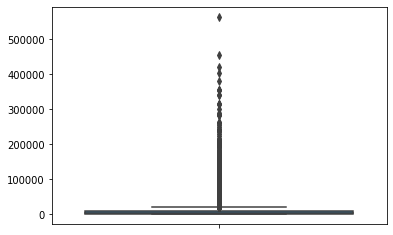

In [189]:
df_wage = df_fifa[['name','wage']]

s_wage = df_fifa['wage']
a_wage = s_wage.values

is_nan = np.isnan(a_wage)

a_wage[is_nan]

a_club = df_fifa['club']

#f'Média: {np.mean(df_fifa[['wage']])}; Mediana: {np.median(df_fifa[['wage']])}; STD: {np.std(df_fifa[['wage']])}'
f'Média: {np.mean(s_wage.values)}; Mediana: {np.median(s_wage.values)}; STD: {np.std(s_wage.values)}'
a_wage.sum()/18207

import seaborn as sns
sns.boxplot(y = a_wage)

Q1 = np.percentile(a_wage, q = [25])
Q3 = np.percentile(a_wage, q = [75])
Q2 = np.percentile(a_wage, q = [50])
p99 = np.percentile(a_wage, q = [99])
p95 = np.percentile(a_wage, q = [95])

IQR = Q3-Q1 # Diferença interquartílica
lim_inferior_outlier = Q1-1.5*IQR
lim_superior_outlier = Q3+1.5*IQR

f'Q1: {Q1}, Q3: {Q3}, Q2: {Q2}, lim_inferior_outlier: {lim_inferior_outlier}, lim_superior_outlier: {lim_superior_outlier}'


In [192]:
df_outliers_wage = df_fifa[['name', 'club', 'nationality', 'wage', 'overall', 'potential']]
df_outliers_wage

,name,club,nationality,wage,overall,potential
ID,,,,,,
158023,L. Messi,FC Barcelona,Argentina,565000.0,94,94
20801,Cristiano Ronaldo,Juventus,Portugal,405000.0,94,94
190871,Neymar Jr,Paris Saint-Germain,Brazil,290000.0,92,93
193080,De Gea,Manchester United,Spain,260000.0,91,93
192985,K. De Bruyne,Manchester City,Belgium,355000.0,91,92
...,...,...,...,...,...,...
238813,J. Lundstram,Crewe Alexandra,England,1000.0,47,65
243165,N. Christoffersson,Trelleborgs FF,Sweden,1000.0,47,63
241638,B. Worman,Cambridge United,England,1000.0,47,67


In [193]:
# Salários outliers superiores
df_outliers_wage[df_outliers_wage['wage'] > lim_superior_outlier].sort_values(by = ['wage'], ascending = False).head(10)

ValueError: ignored

In [187]:
df_fifa[df_fifa[['wage']] > lim_superior_outlier].sort_values(by='wage', ascending=False).head(5)

,name,age,nationality,overall,potential,club,value,wage,special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,position,joined,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,...,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause,total_score
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,565000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,420000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
df_fifa['wage']>lim_superior_outlier

ValueError: ignored

In [180]:
df_fifa[_179]

,name,age,nationality,overall,potential,club,value,wage,special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,position,joined,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,...,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause,total_score
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,565000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,355000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
df_fifa[a].sort_values(by='wage', ascending = False).head()

,name,age,nationality,overall,potential,club,value,wage,special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,position,joined,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,...,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause,total_score
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,565000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,420000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
type(lim_superior_outlier)

numpy.ndarray

In [ ]:
lim_superior_outlier

array([21000.])

In [ ]:
# df_Fifa2 tem 'Wage' sem notações e transformado de string para int64
df_wage = df_Fifa2[['Name','Wage']]

In [ ]:
s_wage = df_Fifa2['Wage']

In [ ]:
type(s_wage)

In [ ]:
a_wage = s_wage.values
a_wage

In [ ]:
len(a_wage)

In [ ]:
is_nan = np.isnan(a_wage)
is_nan


In [ ]:
a_wage[is_nan]

In [ ]:
a_club = df_Fifa['Club']
a_club

In [ ]:
aa = a_club.values
aa

In [ ]:
import numpy as np
aa == 'Nan'

In [ ]:
aa[_228]

In [ ]:
df_Fifa[_208]

In [ ]:
df_Fifa2[_205]

In [ ]:
f'Média: {np.mean(s_wage.values)}; Mediana: {np.median(s_wage.values)}; STD: {np.std(s_wage.values)}'

In [ ]:
a_wage.sum()/18207

In [ ]:
# Import a biblioteca seaborn:
import seaborn as sns

# Boxplot antes dos "outliers"
sns.boxplot(y = a_wage)

In [194]:
Q1 = np.percentile(a_wage, q = [25])
Q3 = np.percentile(a_wage, q = [75])
Q2 = np.percentile(a_wage, q = [50])
p99 = np.percentile(a_wage, q = [99])
p95 = np.percentile(a_wage, q = [95])

IQR = Q3-Q1 # Diferença interquartílica
lim_inferior_outlier = Q1-1.5*IQR
lim_superior_outlier = Q3+1.5*IQR

In [195]:
f'Q1: {Q1}, Q3: {Q3}, Q2: {Q2}, lim_inferior_outlier: {lim_inferior_outlier}, lim_superior_outlier: {lim_superior_outlier}'

'Q1: [1000.], Q3: [9000.], Q2: [3000.], lim_inferior_outlier: [-11000.], lim_superior_outlier: [21000.]'

In [ ]:
len(_162)

In [ ]:
_140.values

In [ ]:
sum(_152)

In [ ]:
df_w = pd.DataFrame([])

In [ ]:
# 17. Quais os insights em relação à variável overall (nota média do atleta) por idade, clube e país?
# 18. Quais são os melhores clubes se levarmos em consideração as variáveis Potential e Overall?
# 19. Apresente o ranking dos goleiros (use a variável/atributo 'Preferred Positions') por Potencial, Overall. Estamos à procura de 'GK'.
# 20. Quem são os jogadores mais rápidos (variável/atributo 'Sprint speed'=?
# 21. Quem são os 5 melhores jogadores em termos de chute (força para chutar) (use a variável/atributo 'Shot power')?
# 22. Quem são os outliers em termos de salário?
# 23. Quem são os outliers em termos de potência no chute?

In [ ]:
Mini-task*: apliquem o IsolationForest (primeiro método para detecção de outliers) para o dataframe FIFA_algumas_features (variáveis numéricas). Qual a conclusão?

Qual sua conclusão em termos de outliers?
Como ficou sua "outlier region"?

In [197]:
!pip install pyod

     |████████████████████████████████| 102kB 1.8MB/s 
     |████████████████████████████████| 2.1MB 5.7MB/s 
  Created wheel for pyod: filename=pyod-0.8.3-cp36-none-any.whl size=110349 sha256=c124c2a10e1b86985b4cca778603e0e37f94683670a122f079ecd40c3506d37d
  Stored in directory: /root/.cache/pip/wheels/29/46/95/86facd235cce1d58ae6747ab1aea2b3742564325a66a60863a
  Created wheel for combo: filename=combo-0.1.1-cp36-none-any.whl size=42113 sha256=c50a22dd2046a54655d375c9d3fb327c0d60180aac96337c29a140601922bd84
  Stored in directory: /root/.cache/pip/wheels/55/ec/e5/a2331372c676c467e70c6646e646edf6997d5c4905b8c0f5e6
  Created wheel for suod: filename=suod-0.0.4-cp36-none-any.whl size=2167158 sha256=c64fbae0723febd2cd71abf845621fc7f63622ec8b138a952830d934a39468dd
  Stored in directory: /root/.cache/pip/wheels/57/55/e5/a4fca65bba231f6d0115059b589148774b41faea25b3f2aa27
Successfully built pyod combo suod


In [199]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.ensemble import IsolationForest

# Scaling variables
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
#from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
#from pyod.models.lof import LOF
from scipy import stats

# remove warnings to keep notebook clean
import warnings
warnings.filterwarnings('ignore')

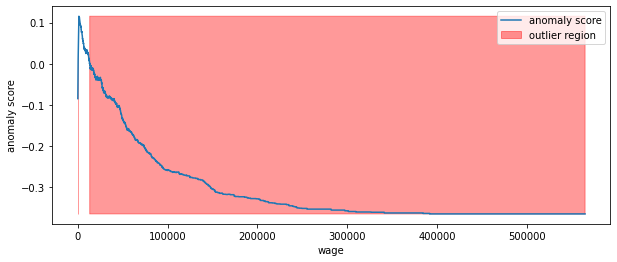

In [200]:
isolation_forest = IsolationForest(n_estimators = 100)
isolation_forest.fit(df_fifa['wage'].values.reshape(-1, 1))
xx = np.linspace(df_fifa['wage'].min(), df_fifa['wage'].max(), len(df_fifa)).reshape(-1, 1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize = (10, 4))
plt.plot(xx, anomaly_score, label = 'anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), where = outlier == -1, color = 'r', alpha = .4, label = 'outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('wage')
plt.show();

In [201]:
f'Q1: {Q1}, Q3: {Q3}, Q2: {Q2}, lim_inferior_outlier: {lim_inferior_outlier}, lim_superior_outlier: {lim_superior_outlier}'

'Q1: [1000.], Q3: [9000.], Q2: [3000.], lim_inferior_outlier: [-11000.], lim_superior_outlier: [21000.]'